# Reviews Analysis

change runtime to GPU

In [179]:
# !nvidia-smi

# 1. Problem Identification & Goal Formulation

+ Problem:
  - In today's market, numerous services and products fall short of meeting user expectations, necessitating a system that can effectively recommend the highest quality options based on insights from user reviews.

+ Goal:
  - The primary objective is to develop a machine learning model that can accurately classify user reviews into two distinct categories: `Positive` and `Negative`. Furthermore, the model should identify and prioritize the `most highly recommended` services and products within the `"Positive" category`, while discouraging the usage of those falling under the `"Negative" category`. This will help users make informed decisions and enhance their overall experience.

# 2. Data Collection

In [13]:
import os
import pandas as pd

In [14]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [15]:
home= os.getcwd()
home

'd:\\Projects\\RA'

load train data

In [16]:
train_data= pd.read_csv(f"{home}/data/train_data/train.csv", names= ['result', 'title', 'reviews']).sample(10000)

In [17]:
train_data.reset_index(drop=True, inplace=True)

In [18]:
train_data.head()

,result,title,reviews
0,2,Lifesaver!,I read that this may help for hot flashes so t...
1,2,MUST HAVE FOR REAL PJ FANS!!!,What a cool movie. It spans the whole 20 years...
2,2,Another greatest hits album...already?,I bought this album last year at Sam Goody for...
3,1,Did not work,Didn't work as described. Didn't make the hair...
4,1,Fanny Hill Memoirs of a Woman of Pleasure,I did not care for this book. I didn't finish ...


In [19]:
train_data.tail()

,result,title,reviews
9995,1,Two Broken Clocks In a Row,I have been the owner of a Moonbeam Clock for ...
9996,2,entertaining as long as you dont think too much,This is actually my first fantasy and I found ...
9997,2,"Great Drama, Too Ambitious","See the movie. From all these other reviews, y..."
9998,1,Crashes before it sails,2 1/2Atmosphere defeats substance in middling ...
9999,1,saturday night racing,fast delivery but game has a glitch tried it o...


In [20]:
train_data.shape

(10000, 3)

we have 1 for negative and 2 for positive, so replace 1 with 0 and 2 with 1

In [21]:
train_data['result'] = train_data['result'].replace({1 : 0, 2 : 1}).astype(int)

In [22]:
train_data.sample(5)

,result,title,reviews
4376,0,Boring,I expected to find wisdom I could apply to my ...
9997,1,"Great Drama, Too Ambitious","See the movie. From all these other reviews, y..."
932,1,excellent read,"What an amazing man, he had the right idea abo..."
3895,0,Not fit for wiping one's behind.,"Congratulations Clive Cussler. You read ""Finge..."
6955,0,Fog up,"I purchased this watch on a different website,..."


In [23]:
train_data.to_csv(f"{home}/data/train_data/new_train.csv")

load test data

In [24]:
test_data= pd.read_csv(f"{home}/data/test_data/test.csv", names= ['result', 'title', 'reviews']).sample(2000)

In [25]:
test_data.reset_index(drop=True, inplace=True)

In [26]:
test_data.head()

,result,title,reviews
0,2,Poulan 400E Electric Chainsaw,The product arrived in perfect working order a...
1,2,Satisfied with this order.,I received this book and it was in perfect con...
2,2,CONGRATULATIONS LH,Terrific rock cd. Having been a rock vocalist ...
3,1,jvc headphones,"In a word, this product is crap. Really it's n..."
4,2,Great Feeder/Great Price,"I purchased this feeder, not because I have a ..."


In [27]:
test_data.tail()

,result,title,reviews
1995,2,I. M. Pei 2-part DVD,This is a wonderful video about a fascinating ...
1996,1,Don't waste your money!,This is one of the worst books I have read on ...
1997,1,A huge step backwards,Microsoft has really missed the mark and has t...
1998,2,A lot of questions answere,This is a grat book for all of those who are s...
1999,2,A worthy sequel...,Once again Disney has released a direct to vid...


In [28]:
test_data.shape

(2000, 3)

we have 1 for negative and 2 for positive, so replace 1 with 0 and 2 with 1

In [29]:
test_data['result'] = test_data['result'].replace({1 : 0, 2 : 1}).astype(int)

In [30]:
test_data.sample(5)

,result,title,reviews
789,0,Disappointment,I have Japanese brand circular polarizer filte...
1796,0,EWWW!,EEEEWWWWWWWW!!!!!!!! This is the ugliest thing...
1275,1,MoMA creates another intergallactic smash!,"Since their countless 7""'s, records, and conce..."
1934,0,What A Letdown......,"First of all, I must say that the box to this ..."
1255,0,"Great Movie, Wrong Medium, Maybe Wrong Material","This DVD is ""Region 2"" format, meaning it is m..."


unique classes

In [31]:
labels= train_data['result'].unique()
labels

array([1, 0])

# 3. Preprocessing

drop missing values

In [32]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [33]:
train_data.isna().sum()

result     0
title      0
reviews    0
dtype: int64

In [34]:
test_data.isna().sum()

result     0
title      0
reviews    0
dtype: int64

drop duplicates

In [35]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

we have column `title` not necessary, so we drop it

In [36]:
train_data.drop('title', axis=1, inplace= True)

In [37]:
test_data.drop('title', axis=1, inplace= True)

In [38]:
train_data.to_csv(f"{home}/data/train_data/new_train.csv")

In [39]:
test_data.to_csv(f"{home}/data/test_data/new_test.csv")

now, we will start the preprcessing step for NLP

Noise Removal

In [204]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

Tokenization

In [205]:
from nltk.tokenize import word_tokenize, sent_tokenize
# nltk.download('punkt')
# nltk.download('wordnet')

Word normalization with `PorterStemmer` and `WordNetLemmatizer`

In [206]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [207]:
import contractions

Define funcation preprocessing

In [208]:
def preprocessing(text):
    stop_words = set(stopwords.words('english'))
    excluding = ['againts','no', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
                 "didn't",'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn',
                 "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't",
                 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    stop_words = [word for word in stop_words if word not in excluding]

    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    cleaned_texts = []
    sentences = sent_tokenize(text)

    for sent in sentences:
        filtered_sent = []
        tokens = word_tokenize(sent.lower())

        for token in tokens:
            token = re.sub(r'[^a-zA-Z0-9]', '', contractions.fix(token))

            if (token.isalpha()) and (len(token) > 2) and (token not in stop_words):
                token = lemmatizer.lemmatize(stemmer.stem(token))
                filtered_sent.append(token)

        cleaned_sent = " ".join(filtered_sent)
        cleaned_texts.append(cleaned_sent)

    preprocessed_text = " ".join(cleaned_texts)
    return preprocessed_text

In [209]:
test_data.shape

(2000, 2)

In [210]:
test_data['reviews'][2]

"Thought I would give a cheapie no-name a try. Right out of the box I noticed the on and off button was difficult to use, and since I purchased this for my 9 y/o son, I thought he may not be able to turn it on and off. I seriously considered returning it then. I should of. It's dead already, inoperative switch. Good Luck.....Oh anybody interested in some extra heads????"

In [211]:
x = preprocessing(test_data['reviews'][2])
x

'thought would give cheapi nonam tri right box notic button difficult use sinc purchas son thought may not abl turn serious consid return  dead alreadi inop switch good luck anybodi interest extra head '

In [212]:
X_train= train_data['reviews'].values
y_train= train_data['result'].values.tolist()

In [213]:
X_test= test_data['reviews'].values
y_test= test_data['result'].values.tolist()

# 4. EDA

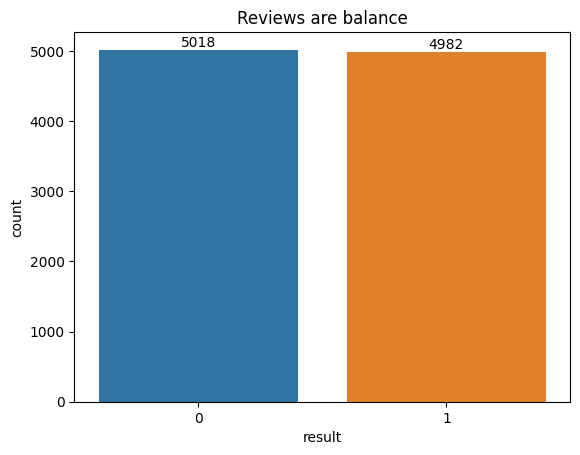

In [214]:
# plot
ax= sns.countplot(x=train_data['result'],
                  data=train_data)

for p in ax.patches: # bars
    '''
    get_bbox(): return bounding box of the bar, 
    get_points(): returns the coordinates of the four corners of the bounding box.
    '''
    x= p.get_bbox().get_points()[:,0] # extract the x-coordinates of the four corners of the bar rectangle
    y= p.get_bbox().get_points()[1,1] # extract the y-coordinate of the top-right corner
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom') # text on top bar
    
plt.title("Reviews are balance")
plt.show()

# 5. Model Selection

In [218]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

Define the pipeline

In [219]:
pipeline= Pipeline([
    ('tfidf', TfidfVectorizer(use_idf=True,
                              preprocessor= preprocessing, 
                              tokenizer=word_tokenize)),
    ('lr', LogisticRegression())
])

Define a grid of hyperparameters for the MultinomialNB model


In [220]:
param_grid_lr= {
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2), (1,3)],
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 3],
    'tfidf__max_features': [1000, 5000, 10000, 20000],
    'tfidf__analyzer': ['word', 'char', 'char_wb'],
    'lr__C': [0.1, 1, 10]
}

Create GridSearchCV instance

In [221]:
grid_search= GridSearchCV(pipeline,
                          param_grid= param_grid_lr,
                          cv= 5,
                          return_train_score= True)

# 6. Model Training

In [222]:
type(y_train)

list

In [223]:
type(X_train)

numpy.ndarray

Fit the GridSearchCV on your training data

In [224]:
grid_search.fit(X_train, y_train)

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-pa

params for number of iteration

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,params
0,"{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid..."
1,"{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid..."
2,"{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid..."
3,"{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid..."
4,"{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid..."
...,...
76,"{'nb__alpha': 0.001, 'tfidf__max_df': 1.0, 'tf..."
77,"{'nb__alpha': 0.001, 'tfidf__max_df': 1.0, 'tf..."
78,"{'nb__alpha': 0.001, 'tfidf__max_df': 1.0, 'tf..."
79,"{'nb__alpha': 0.001, 'tfidf__max_df': 1.0, 'tf..."


Best parameters

In [ ]:
grid_search.best_params_

{'nb__alpha': 0.1,
 'tfidf__max_df': 0.5,
 'tfidf__min_df': 3,
 'tfidf__ngram_range': (1, 2)}

Best score

In [ ]:
f"{round(grid_search.best_score_*100)}%"

'78%'

 Get the best estimator

In [ ]:
best_pipline= grid_search.best_estimator_

# 7. Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

 Now you can use the best_pipeline for prediction

In [ ]:
y_pred= best_pipline.predict(X_test)

accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100)}%")

Accuracy: 81%


confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[420,  78],
       [116, 385]], dtype=int64)

# 8. Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Heatmap

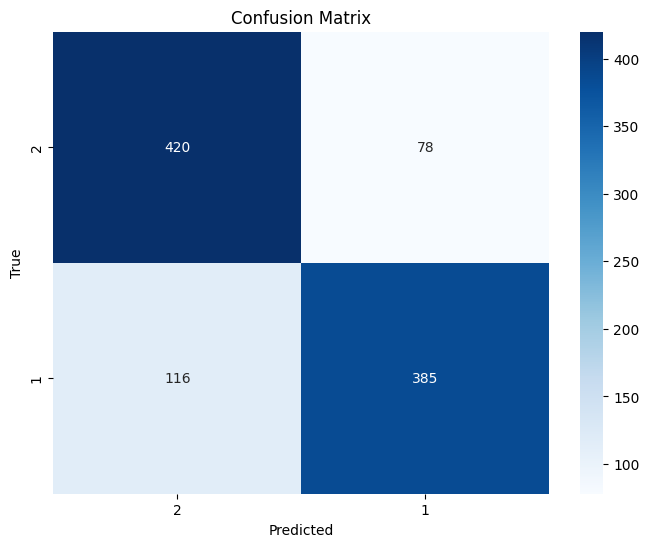

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(cm,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap='Blues',
            fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 9. Save Model

In [ ]:
import joblib
model_path = f'{home}/models/pp_tfidf_lr.joblib'
joblib.dump(best_pipline, model_path)

['d:\\Projects\\RA/models/pp_tfidf_nb.joblib']

In [ ]:
model= joblib.load(model_path)

In [ ]:
model.predict(["hello it's great, i want to buy it"]) # 

array([1])